# Using an MLP for classification

In [ ]:
def load_data(json_path):
  with open(json_path,"r") as fp:
    data = json.load(fp)

  #convert lists into numpy arrays
  inputs = np.array(data["mfcc"])
  targets = np.array(data["labels"])

  return inputs,targets

In [ ]:
X,y = load_data(json_path)

In [ ]:
X

array([[[-2.12685546e+02,  1.00718600e+02, -1.23222813e+01, ...,
         -3.59266860e+00, -1.15427554e+00, -3.71990146e+00],
        [-2.10629281e+02,  1.03621303e+02, -1.16983593e+01, ...,
         -5.39652393e+00,  2.20071144e+00, -3.11685376e+00],
        [-1.95409321e+02,  1.04360651e+02, -1.85502341e-01, ...,
         -1.08171604e+01, -5.88807127e-01, -5.28410592e+00],
        ...,
        [-1.24157705e+02,  6.37352227e+01,  2.11729392e+01, ...,
         -1.65676625e+01,  1.37965153e+01, -2.31835349e+01],
        [-1.10560174e+02,  6.07024768e+01,  1.09157347e+00, ...,
         -1.29631778e+01,  1.39237288e+01, -1.62484843e+01],
        [-1.14273381e+02,  6.70723188e+01, -1.14650597e+01, ...,
         -9.90297501e+00,  1.22151307e+01, -9.50313534e+00]],

       [[-1.47248482e+02,  8.85711779e+01, -1.53050513e+01, ...,
         -1.19021387e+01,  6.63293296e+00, -8.55171762e+00],
        [-1.51392527e+02,  9.47541037e+01, -2.00325920e+01, ...,
         -9.10243162e+00,  9.11345492e

In [ ]:
y

array([0, 0, 0, ..., 9, 9, 9])

Now that we have the X and y for our classification, we'll divide it into train and test using sklearn

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [ ]:
X_train.shape

(6697, 130, 13)

And we are done with creating the dataset.

let's build a model with keras

In [ ]:
from tensorflow.keras import Sequential,layers
from keras.regularizers import l2

model = Sequential()

In [ ]:
#input layer
model.add(layers.Flatten(input_shape = (X.shape[1],X.shape[2])))

#1st hidden layer
model.add(layers.Dense(512,activation="relu",kernel_regularizer = l2(.001)))
model.add(layers.Dropout(0.3))

#2nd hidden layer
model.add(layers.Dense(256,activation="relu",kernel_regularizer = l2(.001)))
model.add(layers.Dropout(0.3))

#3rd hidden layer
model.add(layers.Dense(64,activation="relu",kernel_regularizer = l2(.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10,activation="softmax")) #10 categories

In [ ]:
#Let's build the network
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

Let's train the network

In [ ]:
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs = 100,batch_size=32)

Epoch 1/100
210/210 [==============================] - 4s 19ms/step - loss: 20.9990 - accuracy: 0.1601 - val_loss: 3.5214 - val_accuracy: 0.2470
Epoch 2/100
210/210 [==============================] - 4s 18ms/step - loss: 6.6278 - accuracy: 0.1599 - val_loss: 3.4219 - val_accuracy: 0.1813
Epoch 3/100
210/210 [==============================] - 4s 18ms/step - loss: 4.5611 - accuracy: 0.1456 - val_loss: 3.4702 - val_accuracy: 0.1485
Epoch 4/100
210/210 [==============================] - 4s 18ms/step - loss: 3.8800 - accuracy: 0.1359 - val_loss: 3.4712 - val_accuracy: 0.1367
Epoch 5/100
210/210 [==============================] - 4s 18ms/step - loss: 3.7107 - accuracy: 0.1456 - val_loss: 3.4450 - val_accuracy: 0.1597
Epoch 6/100
210/210 [==============================] - 4s 17ms/step - loss: 3.6098 - accuracy: 0.1471 - val_loss: 3.4155 - val_accuracy: 0.1628
Epoch 7/100
210/210 [==============================] - 4s 18ms/step - loss: 3.5391 - accuracy: 0.1669 - val_loss: 3.3735 - val_accuracy

If we compare the train accuracy vs test accuracy, then we observe that the model is overfitting. So we'll do some regularization or dropout to fix that.

In [ ]:
def plot_history(history):
  fig, axes = plt.subplots(2)

  #accuracy plots
  axes[0].plot(history.history["accuracy"],label="train_accuracy")
  axes[0].plot(history.history["val_accuracy"],label="test_accuracy")
  axes[0].set_ylabel("accuracy")
  axes[0].legend(loc="lower right")
  axes[0].set_title("Accuracy eval")

  #error plots
  axes[1].plot(history.history["loss"],label="train_error")
  axes[1].plot(history.history["val_loss"],label="test_error")
  axes[1].set_ylabel("Error")
  axes[1].set_xlabel("Epoch")
  axes[1].legend(loc="upper right")
  axes[1].set_title("Error eval")

  plt.show()

In [ ]:
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs = 10,batch_size=32)

Epoch 1/10
210/210 [==============================] - 3s 12ms/step - loss: 8.6298 - accuracy: 0.3233 - val_loss: 4.4463 - val_accuracy: 0.3825
Epoch 2/10
210/210 [==============================] - 2s 11ms/step - loss: 3.3204 - accuracy: 0.4060 - val_loss: 2.5343 - val_accuracy: 0.3698
Epoch 3/10
210/210 [==============================] - 2s 11ms/step - loss: 1.8776 - accuracy: 0.4082 - val_loss: 2.2645 - val_accuracy: 0.3853
Epoch 4/10
210/210 [==============================] - 2s 12ms/step - loss: 1.5733 - accuracy: 0.4684 - val_loss: 2.0165 - val_accuracy: 0.4122
Epoch 5/10
210/210 [==============================] - 2s 11ms/step - loss: 1.4236 - accuracy: 0.5161 - val_loss: 1.9315 - val_accuracy: 0.4241
Epoch 6/10
210/210 [==============================] - 2s 12ms/step - loss: 1.2991 - accuracy: 0.5525 - val_loss: 1.9734 - val_accuracy: 0.4544
Epoch 7/10
210/210 [==============================] - 2s 11ms/step - loss: 1.1989 - accuracy: 0.5822 - val_loss: 1.9505 - val_accuracy: 0.4286

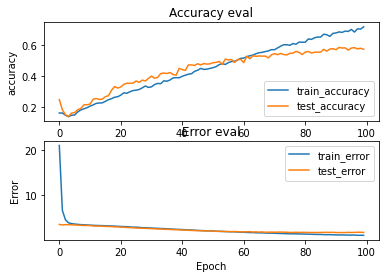

In [ ]:
plot_history(history)